<a href="https://colab.research.google.com/github/czhurdlespeed/TFDevCert/blob/main/TFCert_Practice/07_milestone_project_1_food_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mileston Project 1: Food Vision Big

## Check GPU

In [32]:
!nvidia-smi

Thu Jan 25 14:36:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0              30W /  70W |    135MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Get helper functions

Using functions from previous modules

In [33]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py

--2024-01-25 14:36:42--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py [following]
--2024-01-25 14:36:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-25 14:36:42 (95.6 MB/s) - ‘helpe

In [34]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Use Tensorflow Datasets to Download Data

In [35]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds


In [36]:
# List all available datasets
datasets_list = tfds.list_builders()

In [37]:
print("food101" in datasets_list)

True


In [38]:
# Load in the data
(train_data, test_data), ds_info = tfds.load(name="food101", split = ["train", "validation"], shuffle_files=True, as_supervised=True,
                                             with_info=True)

In [39]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [40]:
# Get the class names
class_names = ds_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Exploring the Food101 data from TF Datasets

In [41]:
# Take one sample
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [42]:
train_one_sample = train_data.take(1)

In [43]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [44]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape},
  Image datatype: {image.dtype},
  Target Food101 class: {label},
  Class name: {class_names[label.numpy()]}
  """)


  Image shape: (306, 512, 3),
  Image datatype: <dtype: 'uint8'>,
  Target Food101 class: 29,
  Class name: cup_cakes
  


In [45]:
# What does our image tensor from TFDS's Food101 look like?
image

<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[199, 100,  15],
        [192,  91,   9],
        [202,  95,  23],
        ...,
        [238, 196, 124],
        [237, 195, 123],
        [236, 194, 122]],

       [[210, 110,  25],
        [207, 105,  23],
        [194,  86,  13],
        ...,
        [238, 196, 124],
        [236, 194, 122],
        [235, 193, 121]],

       [[205, 103,  18],
        [213, 108,  25],
        [196,  86,  11],
        ...,
        [238, 195, 126],
        [237, 194, 125],
        [235, 192, 123]],

       ...,

       [[ 95,  28,  11],
        [ 94,  27,  10],
        [ 84,  17,   0],
        ...,
        [166,  32,   5],
        [166,  32,   3],
        [167,  34,   1]],

       [[ 87,  24,   7],
        [ 83,  18,   0],
        [ 87,  20,   1],
        ...,
        [155,  27,   0],
        [164,  39,   9],
        [156,  33,   0]],

       [[ 83,  21,   6],
        [ 79,  16,   0],
        [ 85,  19,   0],
        ...,
        [149,  25,   

In [46]:
# What are the min and max pixel values of our image?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

## Plot an image from TF Datasets

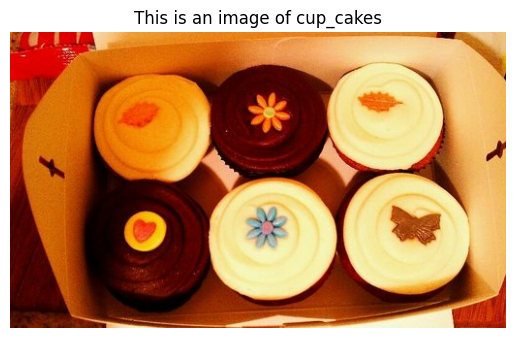

In [47]:
import matplotlib.pyplot as plt
plt.imshow(tf.cast(image, dtype=tf.float32)/255.)
plt.title(f"This is an image of {class_names[label]}");
plt.axis(False);

## Create proprocessing functions for the data

* In `uint8` datatype
* Different sized tensors/images
* Not scaled (pixel values are 0-255)

What models like:
* Data in `float32` dtype or `float16`
* TF likes tensors within batch to be same size
* Scaled (values 0-1) also called normalized tensors

Our preprocessing function:
1. Reshape our images to all the same size
2. Convert dtype of our image tensors from `uint8` to `float32`

In [48]:
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from `uint8` -> `float32` and reshapes
  image to [img_shape, img_shape, color_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape target image
  #image /= 255. # scale images values (not required for EfficientNetBX models from tf.keras.applications)
  return tf.cast(image, tf.float32), label

In [49]:
# preprocess single sample image and check the outputs
preprocessed_img = preprocess_img(image,label)[0]
print(f"Image before preprocessing: \n {image[:2]}..., \n Shape: {image.shape}, \n Datatype: {image.dtype}")
print(f"Preprocessed image: \n {preprocessed_img[:2]}..., \n Shape: {preprocessed_img.shape}, \n Datatype: {preprocessed_img.dtype}")

Image before preprocessing: 
 [[[199 100  15]
  [192  91   9]
  [202  95  23]
  ...
  [238 196 124]
  [237 195 123]
  [236 194 122]]

 [[210 110  25]
  [207 105  23]
  [194  86  13]
  ...
  [238 196 124]
  [236 194 122]
  [235 193 121]]]..., 
 Shape: (306, 512, 3), 
 Datatype: <dtype: 'uint8'>
Preprocessed image: 
 [[[196.98405    96.515305   13.443877 ]
  [185.15625    75.776146   10.615431 ]
  [176.09981    62.711414    9.320153 ]
  ...
  [237.2455    192.6027    122.24549  ]
  [238.        196.        124.       ]
  [236.4598    194.4598    122.459785 ]]

 [[209.20886   106.47194    23.047512 ]
  [168.58833    56.285706    0.8501243]
  [166.6894     53.45121     2.8341837]
  ...
  [236.62468   192.2172    121.85998  ]
  [238.50987   195.96077   125.60809  ]
  [235.9958    193.4467    123.09402  ]]]..., 
 Shape: (224, 224, 3), 
 Datatype: <dtype: 'float32'>


## Batch and prepare datasets

In [50]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn into batches and prefetch it (speeds up loading)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Same for testing data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [51]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create Modeling Callbacks

* TensorBoard callback to log training results
* ModelCheckpoint callabck to save our model's progress after feature extraction

In [74]:
# Create tensorboard callback (import from helper functions)
from helper_functions import create_tensorboard_callback
# Create a ModelCheckpoint callback
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=1) # don't print status



In [53]:
tf.__version__

'2.15.0'

In [54]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # Set global data policy to mixed precision


In [55]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [75]:
## Build Feature extraction model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create fuctional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
original_weights = model.get_weights()

In [61]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

In [62]:
# Computations are done in float16 but variables/results are stored in float32
for layer in model.layers:
  if layer.name == "efficientnetb0":
      for elayer in layer.layers:
            print(f"Datatype of {elayer.name}: {elayer.dtype_policy}")
  else:
     print(f"Datatype of {layer.name}: {layer.dtype_policy}")

Datatype of input_layer: <Policy "float32">
Datatype of input_3: <Policy "float32">
Datatype of rescaling_4: <Policy "mixed_float16">
Datatype of normalization_2: <Policy "mixed_float16">
Datatype of rescaling_5: <Policy "mixed_float16">
Datatype of stem_conv_pad: <Policy "mixed_float16">
Datatype of stem_conv: <Policy "mixed_float16">
Datatype of stem_bn: <Policy "mixed_float16">
Datatype of stem_activation: <Policy "mixed_float16">
Datatype of block1a_dwconv: <Policy "mixed_float16">
Datatype of block1a_bn: <Policy "mixed_float16">
Datatype of block1a_activation: <Policy "mixed_float16">
Datatype of block1a_se_squeeze: <Policy "mixed_float16">
Datatype of block1a_se_reshape: <Policy "mixed_float16">
Datatype of block1a_se_reduce: <Policy "mixed_float16">
Datatype of block1a_se_expand: <Policy "mixed_float16">
Datatype of block1a_se_excite: <Policy "mixed_float16">
Datatype of block1a_project_conv: <Policy "mixed_float16">
Datatype of block1a_project_bn: <Policy "mixed_float16">
Datat

## Fit the feature extraction model

In [63]:
# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extraction = model.fit(train_data,
                                                        epochs=3,
                                                        validation_data = test_data,
                                                        steps_per_epoch=len(train_data),
                                                        validation_steps=int(0.15*len(test_data)),
                                                        callbacks=[create_tensorboard_callback("training_logs",
                                                                                               "efficientnetb0_101_classes_alldata_featureextract"),
                                                                   model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_alldata_featureextract/20240125-143810
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7191 - accuracy: 0.5812

2368/2368 [==============================] - 187s 74ms/step - loss: 1.7191 - accuracy: 0.5812 - val_loss: 1.1290 - val_accuracy: 0.6947
Epoch 2/3
2368/2368 [==============================] - ETA: 0s - loss: 1.2003 - accuracy: 0.6885

2368/2368 [==============================] - 171s 72ms/step - loss: 1.2003 - accuracy: 0.6885 - val_loss: 1.0298 - val_accuracy: 0.7206
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0559 - accuracy: 0.7224

2368/2368 [==============================] - 173s 72ms/step - loss: 1.0559 - accuracy: 0.7224 - val_loss: 0.9888 - val_accuracy: 0.7227


In [65]:
model.evaluate(test_data)

790/790 [==============================] - 54s 68ms/step - loss: 0.9978 - accuracy: 0.7258


[0.9978240132331848, 0.7258217930793762]

In [69]:
base_model.trainable = False

In [70]:
for layer in base_model.layers[-10:]:
  layer.trainable = True

In [71]:
for layer in base_model.layers:
  print(f"{layer.name} {layer.trainable}")

input_3 False
rescaling_4 False
normalization_2 False
rescaling_5 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_

In [72]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [73]:
finetune_epochs = 8
history_101_food_classes_finetuning = model.fit(train_data,
                                                epochs=finetune_epochs,
                                                steps_per_epoch=len(train_data),
                                                validation_data = test_data,
                                                validation_steps=int(0.15*len(test_data)),
                                                initial_epoch=history_101_food_classes_feature_extraction.epoch[-1],
                                                callbacks=[create_tensorboard_callback("training_logs",
                                                                                      "efficientnetb0_101_classes_alldata_finetuning"),
                                                           model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_alldata_finetuning/20240125-150019
Epoch 3/8
2368/2368 [==============================] - ETA: 0s - loss: 0.8899 - accuracy: 0.7721

2368/2368 [==============================] - 179s 71ms/step - loss: 0.8899 - accuracy: 0.7721 - val_loss: 0.9603 - val_accuracy: 0.7373
Epoch 4/8
2368/2368 [==============================] - ETA: 0s - loss: 0.8738 - accuracy: 0.7770

2368/2368 [==============================] - 171s 71ms/step - loss: 0.8738 - accuracy: 0.7770 - val_loss: 0.9576 - val_accuracy: 0.7370
Epoch 5/8
2368/2368 [==============================] - ETA: 0s - loss: 0.8633 - accuracy: 0.7803

2368/2368 [==============================] - 167s 70ms/step - loss: 0.8633 - accuracy: 0.7803 - val_loss: 0.9532 - val_accuracy: 0.7365
Epoch 6/8
2367/2368 [============================>.] - ETA: 0s - loss: 0.8540 - accuracy: 0.7824

2368/2368 [==============================] - 170s 71ms/step - loss: 0.8540 - accuracy: 0.7824 - val_loss: 0.9507 - val_accuracy: 0.7391
Epoch 7/8
2368/2368 [==============================] - ETA: 0s - loss: 0.8454 - accuracy: 0.7853

2368/2368 [==============================] - 170s 71ms/step - loss: 0.8454 - accuracy: 0.7853 - val_loss: 0.9543 - val_accuracy: 0.7378
Epoch 8/8
2367/2368 [============================>.] - ETA: 0s - loss: 0.8372 - accuracy: 0.7880

2368/2368 [==============================] - 168s 70ms/step - loss: 0.8372 - accuracy: 0.7880 - val_loss: 0.9441 - val_accuracy: 0.7405


In [76]:
model.set_weights(original_weights)

In [77]:
model.evaluate(test_data)

790/790 [==============================] - 55s 63ms/step - loss: 4.6720 - accuracy: 0.0110


[4.672021865844727, 0.011049505323171616]

In [78]:
for layer in base_model.layers[-20:]:
  layer.trainable = True

In [80]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  verbose=1)
checkpoint_path = "finetuningcheckpoint/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_loss",
                                                      save_best_only = True)
plateulr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.2,
                                                patience=2,
                                                verbose=1,
                                                min_lr=1e-7)

In [82]:
for layer in model.layers:
  print(f"{layer.name} {layer.trainable} {layer.dtype} {layer.dtype_policy}")

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d_3 True float32 <Policy "mixed_float16">
dense_3 True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [84]:
for layer in model.layers[1].layers:
  print(f"{layer.name} {layer.trainable} {layer.dtype} {layer.dtype_policy}")

input_4 False float32 <Policy "float32">
rescaling_6 False float32 <Policy "mixed_float16">
normalization_3 False float32 <Policy "mixed_float16">
rescaling_7 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float

In [86]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [87]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

In [90]:
for layer in model.layers:
  layer.trainable = True
  print(layer.name, layer.trainable)

input_layer True
efficientnetb0 True
global_average_pooling2d_3 True
dense_3 True
softmax_float32 True


In [91]:
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable)

input_4 True
rescaling_6 True
normalization_3 True
rescaling_7 True
stem_conv_pad True
stem_conv True
stem_bn True
stem_activation True
block1a_dwconv True
block1a_bn True
block1a_activation True
block1a_se_squeeze True
block1a_se_reshape True
block1a_se_reduce True
block1a_se_expand True
block1a_se_excite True
block1a_project_conv True
block1a_project_bn True
block2a_expand_conv True
block2a_expand_bn True
block2a_expand_activation True
block2a_dwconv_pad True
block2a_dwconv True
block2a_bn True
block2a_activation True
block2a_se_squeeze True
block2a_se_reshape True
block2a_se_reduce True
block2a_se_expand True
block2a_se_excite True
block2a_project_conv True
block2a_project_bn True
block2b_expand_conv True
block2b_expand_bn True
block2b_expand_activation True
block2b_dwconv True
block2b_bn True
block2b_activation True
block2b_se_squeeze True
block2b_se_reshape True
block2b_se_reduce True
block2b_se_expand True
block2b_se_excite True
block2b_project_conv True
block2b_project_bn True
b

In [92]:
for layer in model.layers[1].layers[:-20]:
  layer.trainable=False
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable)

input_4 False
rescaling_6 False
normalization_3 False
rescaling_7 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_

In [93]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
efficientnetb0 True
global_average_pooling2d_3 True
dense_3 True
softmax_float32 True


In [94]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [95]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

In [96]:
history_101_foodclasses_finetune_final_attempt = model.fit(train_data,
          epochs=100,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=int(0.15*len(test_data)),
          callbacks=[create_tensorboard_callback("training_logs",
                                                 "final_finetuning_attempt"),
                     model_checkpoint,
                     early_stopping,
                     plateulr]
          )

Saving TensorBoard log files to: training_logs/final_finetuning_attempt/20240125-154615
Epoch 1/100
2368/2368 [==============================] - 213s 84ms/step - loss: 1.7681 - accuracy: 0.5535 - val_loss: 1.0741 - val_accuracy: 0.6994 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 204s 85ms/step - loss: 1.1307 - accuracy: 0.7017 - val_loss: 0.9287 - val_accuracy: 0.7474 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 198s 83ms/step - loss: 0.9169 - accuracy: 0.7533 - val_loss: 0.8691 - val_accuracy: 0.7595 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - 201s 84ms/step - loss: 0.7590 - accuracy: 0.7932 - val_loss: 0.8276 - val_accuracy: 0.7680 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - 177s 74ms/step - loss: 0.6187 - accuracy: 0.8307 - val_loss: 0.8607 - val_accuracy: 0.7667 - lr: 1.0000e-04
Epoch 6/100
2368/2368 [==============================] - ETA: 0s - loss: 0.4960 - accur